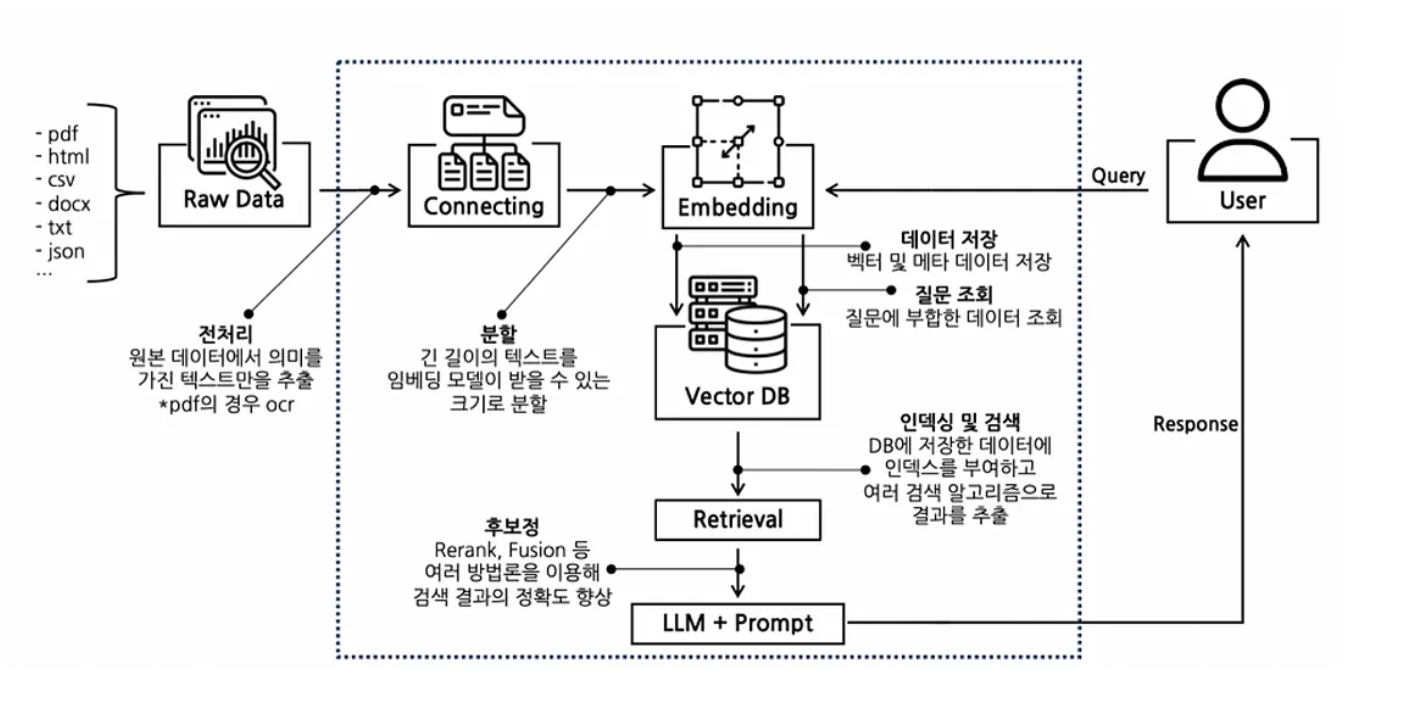

## Optimizing PreProcessing (Load Data)

In my case, most of resources of course contain tabular of unstructured text data.<br>
So we should keep these kinds of data structure during load dataset (OCR)

**problem : which pdf loader is most reasonable for Tabule of unstructured data Ingestion?**

**Main Metrics for Evaluating PDF Loader :**

1. it can maintain the structure of table?
2. it can read multiple column structure of documents?
3. is it fast enough?

In [44]:
import os
import time
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
file_path = "examplefiles/attention is all you need.pdf"

## Idea1. Rule-Based Parsing Libraries

### 1. PyPDFium2loader

In [24]:
from langchain_community.document_loaders import PyPDFium2Loader

start1 = time.time()
loader1 = PyPDFium2Loader(file_path=file_path)
end1 = time.time()

docs = loader1.load()

c:\Users\USER\anaconda3\envs\tf\lib\site-packages\pypdfium2\_helpers\textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [25]:
docs[0].metadata

{'source': 'examplefiles/attention is all you need.pdf', 'page': 0}

In [26]:
print(docs[7].page_content)

# (1) the structure of the table is violated.
# (2) It cannot read multi column data

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the
English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.
Model
BLEU Training Cost (FLOPs)
EN-DE EN-FR EN-DE EN-FR
ByteNet [18] 23.75
Deep-Att + PosUnk [39] 39.2 1.0 · 1020
GNMT + RL [38] 24.6 39.92 2.3 · 1019 1.4 · 1020
ConvS2S [9] 25.16 40.46 9.6 · 1018 1.5 · 1020
MoE [32] 26.03 40.56 2.0 · 1019 1.2 · 1020
Deep-Att + PosUnk Ensemble [39] 40.4 8.0 · 1020
GNMT + RL Ensemble [38] 26.30 41.16 1.8 · 1020 1.1 · 1021
ConvS2S Ensemble [9] 26.36 41.29 7.7 · 1019 1.2 · 1021
Transformer (base model) 27.3 38.1 3.3 · 1018
Transformer (big) 28.4 41.8 2.3 · 1019
Residual Dropout We apply dropout [33] to the output of each sub-layer, before it is added to the
sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the
positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of
Pdrop = 0.1.


In [27]:
print("It takes {:.5f} secs".format(end1 - start1))

It takes 0.00100 secs


### 2. PyPDFLoader

In [28]:
from langchain_community.document_loaders import PyPDFLoader

start2 = time.time()
loader2 = PyPDFLoader(file_path=file_path)
end2 = time.time()

docs = loader2.load()

In [29]:
docs[0].metadata

{'source': 'examplefiles/attention is all you need.pdf', 'page': 0}

In [30]:
print(docs[7].page_content)

# (1) the structure of the table is violated.

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the
English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.
Model
BLEU Training Cost (FLOPs)
EN-DE EN-FR EN-DE EN-FR
ByteNet [18] 23.75
Deep-Att + PosUnk [39] 39.2 1.0 · 1020
GNMT + RL [38] 24.6 39.92 2.3 · 1019 1.4 · 1020
ConvS2S [9] 25.16 40.46 9.6 · 1018 1.5 · 1020
MoE [32] 26.03 40.56 2.0 · 1019 1.2 · 1020
Deep-Att + PosUnk Ensemble [39] 40.4 8.0 · 1020
GNMT + RL Ensemble [38] 26.30 41.16 1.8 · 1020 1.1 · 1021
ConvS2S Ensemble [9] 26.36 41.29 7.7 · 1019 1.2 · 1021
Transformer (base model) 27.3 38.1 3.3 · 1018
Transformer (big) 28.4 41.8 2.3 · 1019
Residual Dropout We apply dropout [33] to the output of each sub-layer, before it is added to the
sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the
positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of
Pdrop = 0.1.


In [31]:
print("It takes {:.5f} secs".format(end2 - start2))

It takes 0.00100 secs


### 3. Fitz

In [32]:
import fitz

doc_list = []
start3 = time.time()
doc = fitz.open(file_path)
for page in doc:
    text = page.get_text()
    doc_list.append(text)
end3 = time.time()

In [33]:
doc_list[:3]

# no metadata

['Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrenc

In [34]:
print(doc_list[7])

# (1) the structure of the table is violated.

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the
English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.
Model
BLEU
Training Cost (FLOPs)
EN-DE
EN-FR
EN-DE
EN-FR
ByteNet [18]
23.75
Deep-Att + PosUnk [39]
39.2
1.0 · 1020
GNMT + RL [38]
24.6
39.92
2.3 · 1019
1.4 · 1020
ConvS2S [9]
25.16
40.46
9.6 · 1018
1.5 · 1020
MoE [32]
26.03
40.56
2.0 · 1019
1.2 · 1020
Deep-Att + PosUnk Ensemble [39]
40.4
8.0 · 1020
GNMT + RL Ensemble [38]
26.30
41.16
1.8 · 1020
1.1 · 1021
ConvS2S Ensemble [9]
26.36
41.29
7.7 · 1019
1.2 · 1021
Transformer (base model)
27.3
38.1
3.3 · 1018
Transformer (big)
28.4
41.8
2.3 · 1019
Residual Dropout
We apply dropout [33] to the output of each sub-layer, before it is added to the
sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the
positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of
Pdrop = 0.1.


## Idea 2. Markdown Based PDF Extraction

then how about read pdf and convert it into markdown format?
markdown format can keep tabular structure without loss.

#### PyMuPDF4llm

In [35]:
import pymupdf4llm

llama_reader = pymupdf4llm.LlamaMarkdownReader()
llama_docs = llama_reader.load_data(file_path)

Processing examplefiles/attention is all you need.pdf...
[                                        ] (0/1=======================================[========================================] (1/1]
Processing examplefiles/attention is all you need.pdf...
[                                        ] (0/1=======================================[========================================] (1/1]
Processing examplefiles/attention is all you need.pdf...
[                                        ] (0/1=======================================[========================================] (1/1]
Processing examplefiles/attention is all you need.pdf...
[                                        ] (0/1=======================================[========================================] (1/1]
Processing examplefiles/attention is all you need.pdf...
[                                        ] (0/1=======================================[========================================] (1/1]
Processing examplefiles/attention is all

In [37]:
llama_docs[0].metadata

{'format': 'PDF 1.5',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'LaTeX with hyperref',
 'producer': 'pdfTeX-1.40.25',
 'creationDate': 'D:20240410211143Z',
 'modDate': 'D:20240410211143Z',
 'trapped': '',
 'encryption': None,
 'page': 1,
 'total_pages': 15,
 'file_path': 'examplefiles/attention is all you need.pdf'}

In [39]:
print(llama_docs[9].text)

# It can keep simple structure of tabular dataset with its header

Table 4: The Transformer generalizes well to English constituency parsing (Results are on Section 23
of WSJ)

**Parser** **Training** **WSJ 23 F1**

Vinyals & Kaiser el al. (2014) [37] WSJ only, discriminative 88.3
Petrov et al. (2006) [29] WSJ only, discriminative 90.4
Zhu et al. (2013) [40] WSJ only, discriminative 90.4
Dyer et al. (2016) [8] WSJ only, discriminative 91.7

Transformer (4 layers) WSJ only, discriminative 91.3

Zhu et al. (2013) [40] semi-supervised 91.3
Huang & Harper (2009) [14] semi-supervised 91.3
McClosky et al. (2006) [26] semi-supervised 92.1
Vinyals & Kaiser el al. (2014) [37] semi-supervised 92.1

Transformer (4 layers) semi-supervised 92.7

Luong et al. (2015) [23] multi-task 93.0
Dyer et al. (2016) [8] generative 93.3

increased the maximum output length to input length + 300. We used a beam size of 21 and α = 0.3
for both WSJ only and the semi-supervised setting.

Our results in Table 4 show that despite the lack of task-specific tuning our model performs s

In [42]:
print(llama_docs[7].text)

# some complex tables cannot be read.
# we should test this kinds of loader by adapting langchain

Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the
English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.

BLEU Training Cost (FLOPs)
Model

EN-DE EN-FR EN-DE EN-FR

ByteNet [18] 23.75
Deep-Att + PosUnk [39] 39.2 1.0 10[20]
_·_

GNMT + RL [38] 24.6 39.92 2.3 10[19] 1.4 10[20]
_·_ _·_

ConvS2S [9] 25.16 40.46 9.6 10[18] 1.5 10[20]
_·_ _·_

MoE [32] 26.03 40.56 2.0 10[19] 1.2 10[20]
_·_ _·_

Deep-Att + PosUnk Ensemble [39] 40.4 8.0 10[20]
_·_

GNMT + RL Ensemble [38] 26.30 41.16 1.8 10[20] 1.1 10[21]
_·_ _·_

ConvS2S Ensemble [9] 26.36 **41.29** 7.7 · 10[19] 1.2 · 10[21]

Transformer (base model) 27.3 38.1 **3.3 · 10[18]**

Transformer (big) **28.4** **41.8** 2.3 · 10[19]


**Residual Dropout** We apply dropout [33] to the output of each sub-layer, before it is added to the
sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the
positional encodings in both t

#### 2. LlamaParser

In [48]:
import nest_asyncio
nest_asyncio.apply()

In [49]:
from llama_parse import LlamaParse
from llama_index.core import SimpleDirectoryReader

parser = LlamaParse(
    result_type="markdown", 
    num_workers=8, 
    verbose=True
)

file_extractor = {".pdf": parser}

documents = SimpleDirectoryReader(
    input_files=[file_path],
    file_extractor=file_extractor,
).load_data()

Started parsing the file under job_id 81750e3a-52b8-46ad-b975-3884409e87a9


In [50]:
docs = [doc.to_langchain_format() for doc in documents]

In [54]:
print(docs[9].page_content)

|Parser|Training|WSJ 23 F1|
|---|---|---|
|Vinyals & Kaiser el al. (2014) [37]|WSJ only, discriminative|88.3|
|Petrov et al. (2006) [29]|WSJ only, discriminative|90.4|
|Zhu et al. (2013) [40]|WSJ only, discriminative|90.4|
|Dyer et al. (2016) [8]|WSJ only, discriminative|91.7|
|Transformer (4 layers)|WSJ only, discriminative|91.3|
|Zhu et al. (2013) [40]|semi-supervised|91.3|
|Huang & Harper (2009) [14]|semi-supervised|91.3|
|McClosky et al. (2006) [26]|semi-supervised|92.1|
|Vinyals & Kaiser el al. (2014) [37]|semi-supervised|92.1|
|Transformer (4 layers)|semi-supervised|92.7|
|Luong et al. (2015) [23]|multi-task|93.0|
|Dyer et al. (2016) [8]|generative|93.3|

increased the maximum output length to input length + 300. We used a beam size of 21 and α = 0.3 for both WSJ only and the semi-supervised setting.

Our results in Table 4 show that despite the lack of task-specific tuning our model performs surprisingly well, yielding better results than all previously reported models with the 

In [55]:
print(docs[7].page_content)

# wow it maintains structure of complex table very well!!

# Table 2: The Transformer achieves better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost.

|Model|BLEU EN-DE|BLEU EN-FR|Training Cost (FLOPs) EN-DE|Training Cost (FLOPs) EN-FR|
|---|---|---|---|---|
|ByteNet [18]|23.75| | | |
|Deep-Att + PosUnk [39]| |39.2|1.0 · 1020| |
|GNMT + RL [38]|24.6|39.92|2.3 · 1018|1.4 · 1020|
|ConvS2S [9]|25.16|40.46|9.6 · 1019|1.5 · 1020|
|MoE [32]|26.03|40.56|2.0 · 10|1.2 · 1020|
|Deep-Att + PosUnk Ensemble [39]| |40.4| |8.0 · 1021|
|GNMT + RL Ensemble [38]|26.30|41.16|1.8 · 1019|1.1 · 1021|
|ConvS2S Ensemble [9]|26.36|41.29|7.7 · 10|1.2 · 10|
|Transformer (base model)|27.3|38.1| |3.3 · 1018|
|Transformer (big)|28.4|41.8| |2.3 · 10|

# Residual Dropout

We apply dropout [33] to the output of each sub-layer, before it is added to the sub-layer input and normalized. In addition, we apply dropout to the sums of the embeddings and the positional encodings in

## Idea 3. Deep-Learning Based PDF Extraction

#### 1. Unstructured

In [35]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [ ]:
from unstructured.partition.auto import partition

test = "examplefiles/attention is all you need.pdf"

elements = partition(filename=test,
                     strategy='hi_res',
           )

tables = [el for el in elements if el.category == "Table"]

# too slow ... unappropriate for generating real-time chatbot.